# DIABETIES ANALYSIS

## EXPLORATORY DATA ANALYSIS (EDA)

In [36]:
!pip install pandas numpy seaborn matplotlib lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.5 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')       #importing the kaggle file from web
df.head()                                                                                       #verifying if file successfully imported

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape                      # Number of rows and columns
df.columns                    # Column names
df.info()                     # Data types and non-null values
df.describe()                 # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool


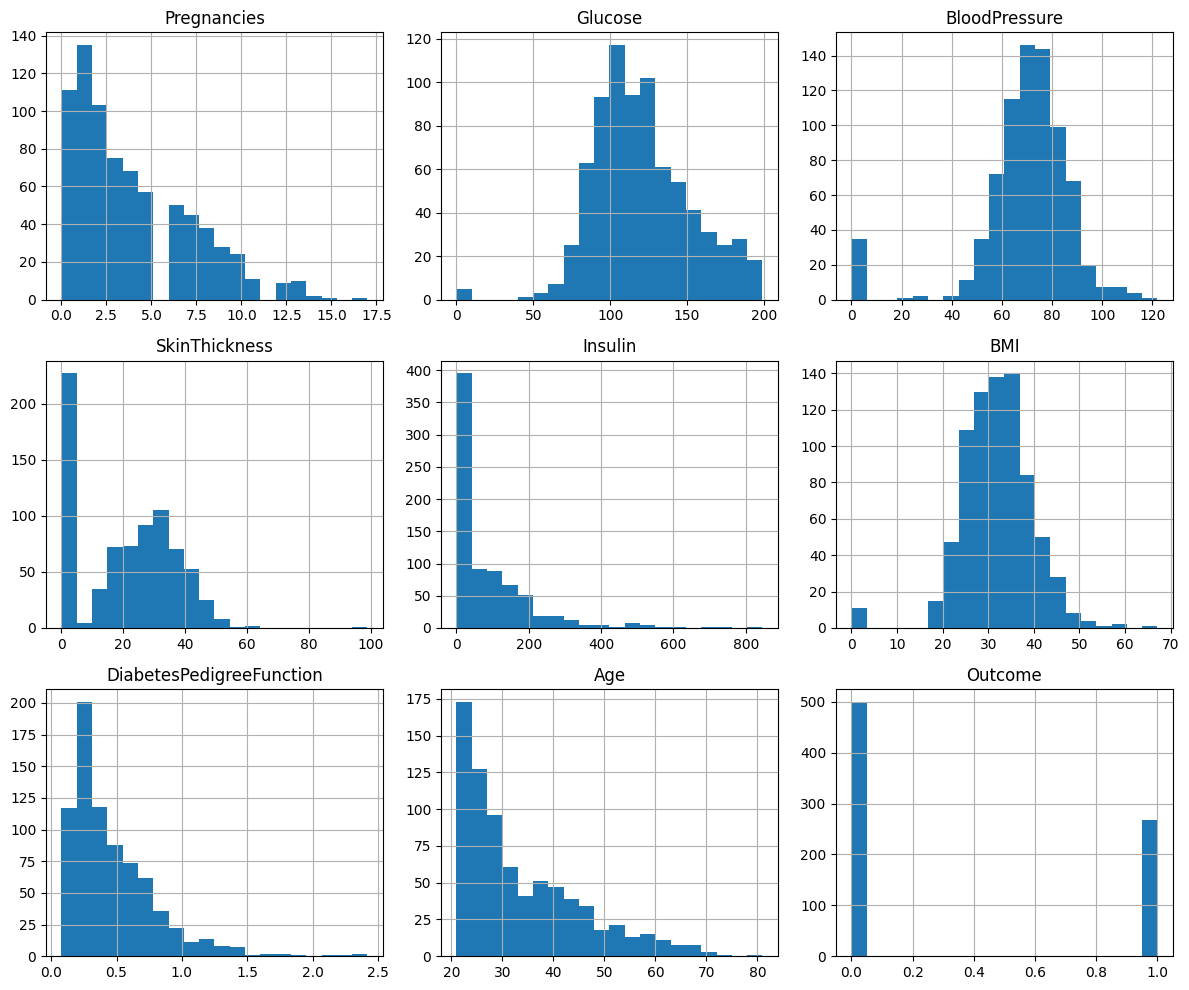

In [6]:
print(df.isnull().sum())
print(df.duplicated())

# Histogram of each feature
df.hist(bins=20, figsize=(12,10))
plt.tight_layout()
plt.show()

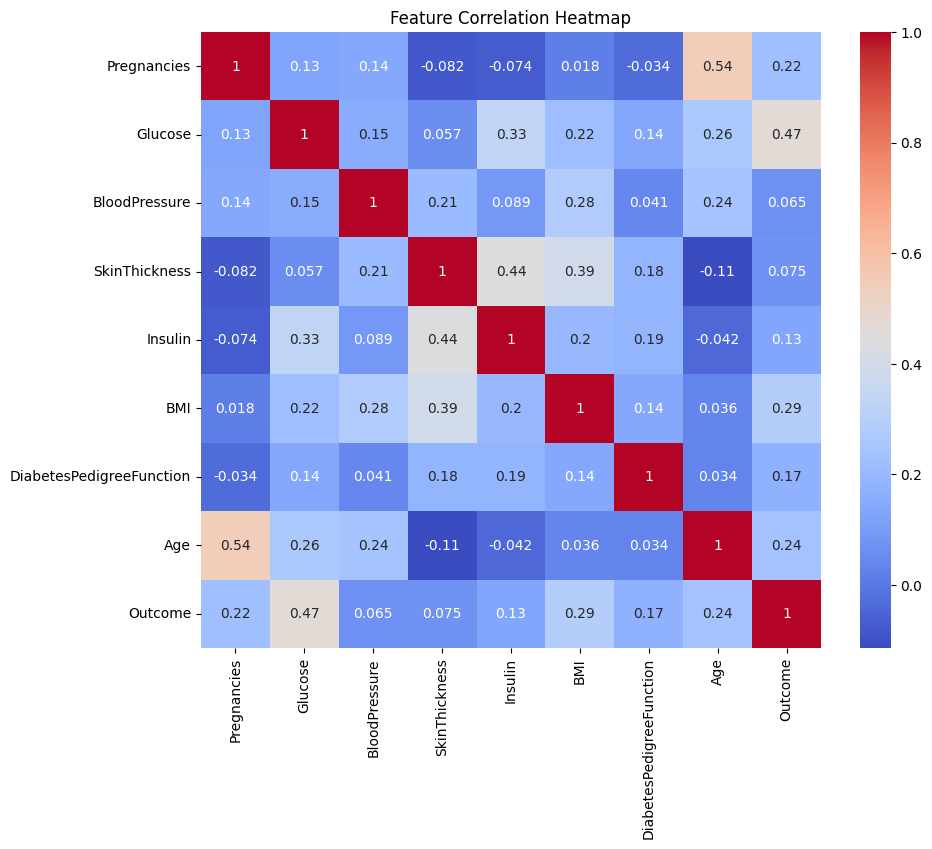

In [7]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [8]:
#replacing null/0 values with the average value of the column

columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_to_replace:
    non_zero_mean = df[df[col] != 0][col].mean()
    df[col] = df[col].replace(0, non_zero_mean)


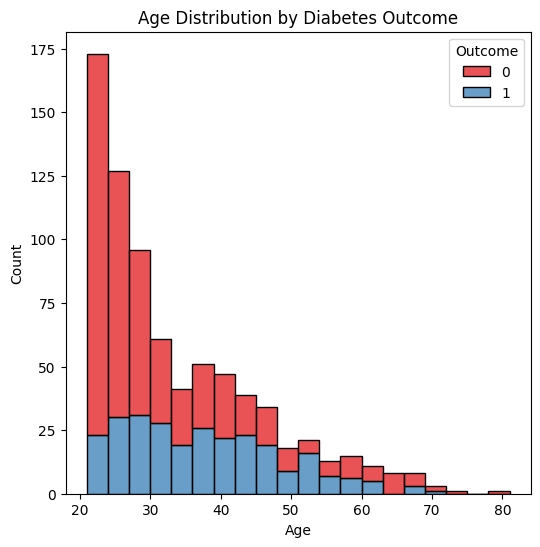

In [9]:
#comparision between age and diabetic output

plt.figure(figsize=(6, 6))
sns.histplot(data=df, x='Age', hue='Outcome', multiple='stack', palette='Set1', bins=20)
plt.title('Age Distribution by Diabetes Outcome')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

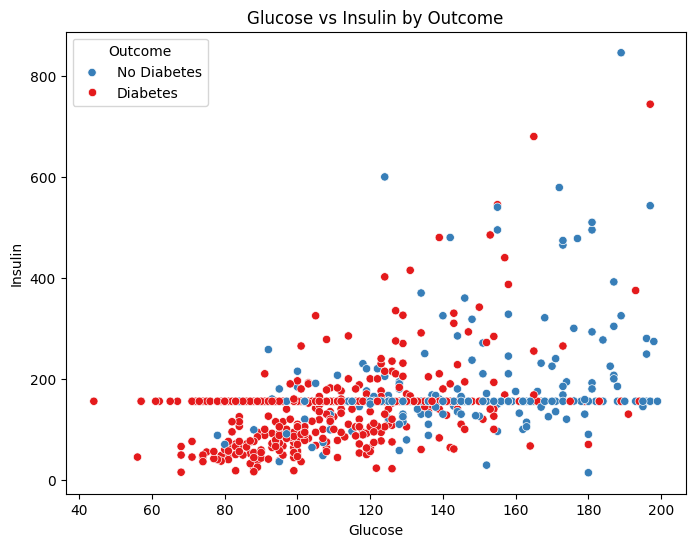

In [10]:
#comparision between glucose,insulin and diabetic output

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Glucose', y='Insulin', hue='Outcome', palette='Set1')
plt.title("Glucose vs Insulin by Outcome")
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()


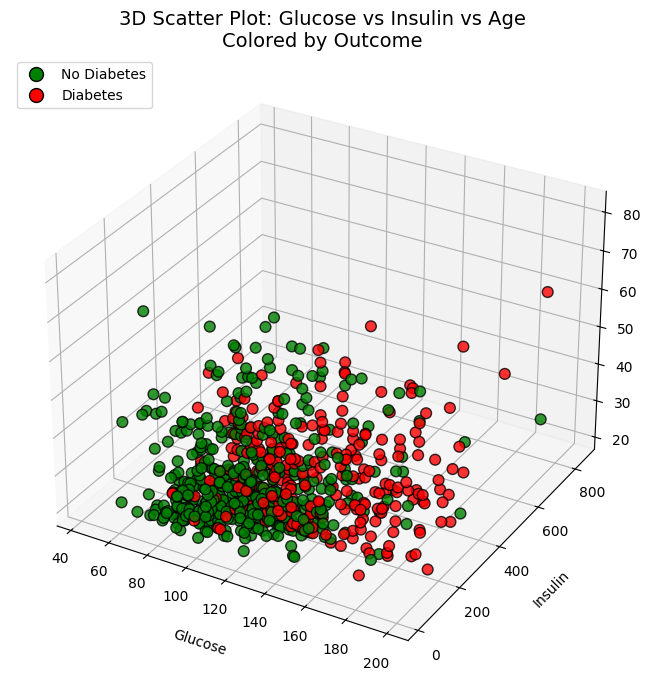

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Create a color map based on Outcome
colors = np.where(df['Outcome'] == 1, 'red', 'green')

# Create figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot
scatter = ax.scatter(df['Glucose'], df['Insulin'], df['Age'],
                     c=colors, s=60, edgecolors='k', alpha=0.8)

# Axes labels
ax.set_xlabel('Glucose', labelpad=10)
ax.set_ylabel('Insulin', labelpad=10)
ax.set_zlabel('Age', labelpad=10)
ax.set_title('3D Scatter Plot: Glucose vs Insulin vs Age\nColored by Outcome', fontsize=14)

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='No Diabetes',
           markerfacecolor='green', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Diabetes',
           markerfacecolor='red', markersize=10, markeredgecolor='k')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()



## USING LOGISTIC REGRESSION MODEL

In [12]:
#Train-test Split
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']               # Target variable (0 = no diabetes, 1 = diabetes)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test set
y_pred = model.predict(X_test)

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7532467532467533

Confusion Matrix:
 [[82 17]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



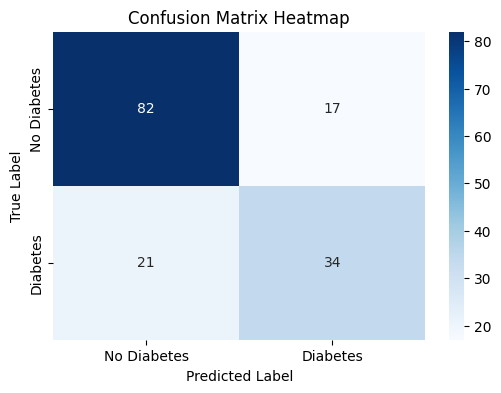

In [15]:
cm = confusion_matrix(y_test, y_pred)              # Generate confusion matrix

plt.figure(figsize=(6, 4))                         # Plot heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split using scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression(max_iter=1000)
model_2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
# Predict on test set using normalized model
y_pred_2 = model_2.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy (Normalized):", accuracy_score(y_test, y_pred_2))
print("Confusion Matrix (Normalized):\n", confusion_matrix(y_test, y_pred_2))
print("\nClassification Report (Normalized):\n", classification_report(y_test, y_pred_2))


Accuracy (Normalized): 0.7532467532467533
Confusion Matrix (Normalized):
 [[82 17]
 [21 34]]

Classification Report (Normalized):
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



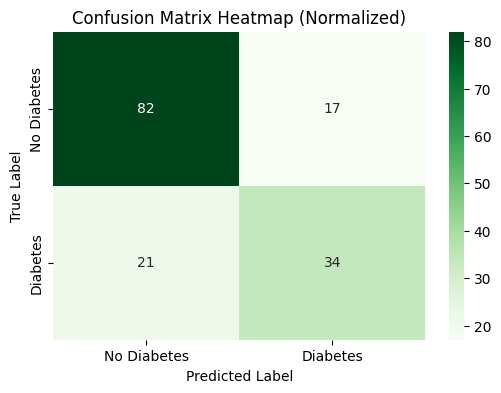

In [19]:
cm_2 = confusion_matrix(y_test, y_pred_2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Greens', 
            xticklabels=["No Diabetes", "Diabetes"], 
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (Normalized)')
plt.show()


In [20]:
print("Original Accuracy:", accuracy_score(y_test, y_pred))
print("Normalized Accuracy:", accuracy_score(y_test, y_pred_2))

Original Accuracy: 0.7532467532467533
Normalized Accuracy: 0.7532467532467533


## CHANGING MODEL TO RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define base model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit on training data
grid_search.fit(X_train, y_train)

# Get best model
rf_model = grid_search.best_estimator_

print("Best Parameters Found:\n", grid_search.best_params_)

# Predict
y_pred_rf = rf_model.predict(X_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters Found:
 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.7597402597402597
Confusion Matrix:
 [[78 21]
 [16 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



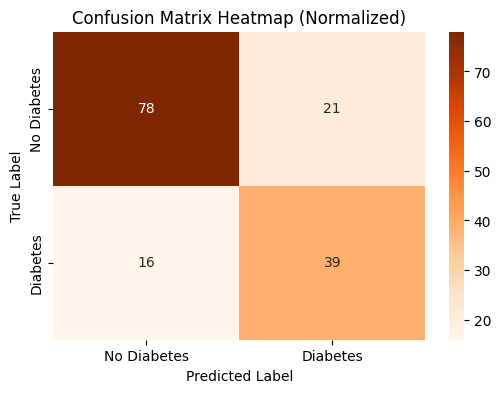

In [35]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=["No Diabetes", "Diabetes"], 
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (Normalized)')
plt.show()

## CHANGING MODEL TO LIGHTGBM

In [40]:
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

lgb_model = lgb.LGBMClassifier(random_state=42)

grid = GridSearchCV(estimator=lgb_model, param_grid=param_grid, 
                    cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid.fit(X_train, y_train)

print("Best Parameters Found:\n", grid.best_params_)

best_lgb_model = grid.best_estimator_
y_pred_lgb_tuned = best_lgb_model.predict(X_test)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

C:\Users\Jay Tewari\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))


Accuracy: 0.7337662337662337
Confusion Matrix:
 [[75 24]
 [17 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.61      0.69      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



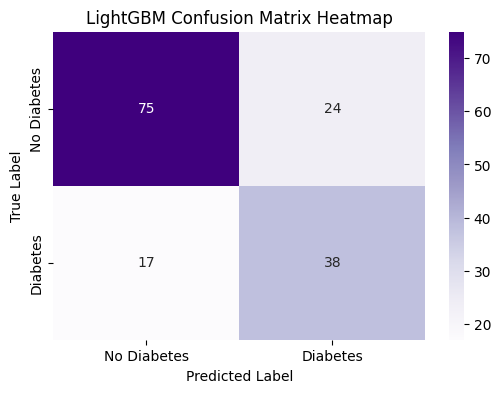

In [42]:
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Purples',
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('LightGBM Confusion Matrix Heatmap')
plt.show()
